In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import seaborn as sns

np.random.seed(420)

In [2]:
def memory_patterns(p, n = 100):
    return np.random.choice((-1, 1), size = (p, n))

def weight_matrix(patterns):

    p, n = patterns.shape 
    M = np.zeros(shape = (n, n))

    for i in range(p):
        u = patterns[i]
        M += np.outer(u, u)

    np.fill_diagonal(M, 0)
    return M

def est_similarity(s, u):
    return (1/len(s)) * np.dot(s, u)

def initialise_state(q_0, u):
    n = len(u)
    initial_state = np.zeros(shape = (n))
    for i in range(n):
        if q_0 > np.random.uniform():
            initial_state[i] = u[i]
        else:
            initial_state[i] = np.random.choice((-1, 1))
    return initial_state

In [3]:
qs = np.arange(0, 1.1, 0.1)
ps = [1, 5, 10]
N = 100

timesteps = 5
q_traces = np.zeros(shape = (len(ps), len(qs), timesteps))

for k, p in enumerate(ps): 
    for j, q0 in enumerate(qs): 
        u = memory_patterns(p)
        m = weight_matrix(u)
        q = np.zeros(shape = (timesteps))
        s = np.zeros(shape = (timesteps, N))
        s[0, :] = initialise_state(q0, u[0])
        q[0] = est_similarity(s[0, :], u[0])

        for i in range(1, timesteps):
            h = np.dot(m, s[i-1, :]) 
            s[i, :] = np.where(h >= 0, 1, -1)
            q[i] = est_similarity(s[i, :], u[0])
        q_traces[k, j, :] = q

/var/folders/0g/tlh4mk6s7sdb77gbc8l61l8w0000gn/T/ipykernel_46990/747635669.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


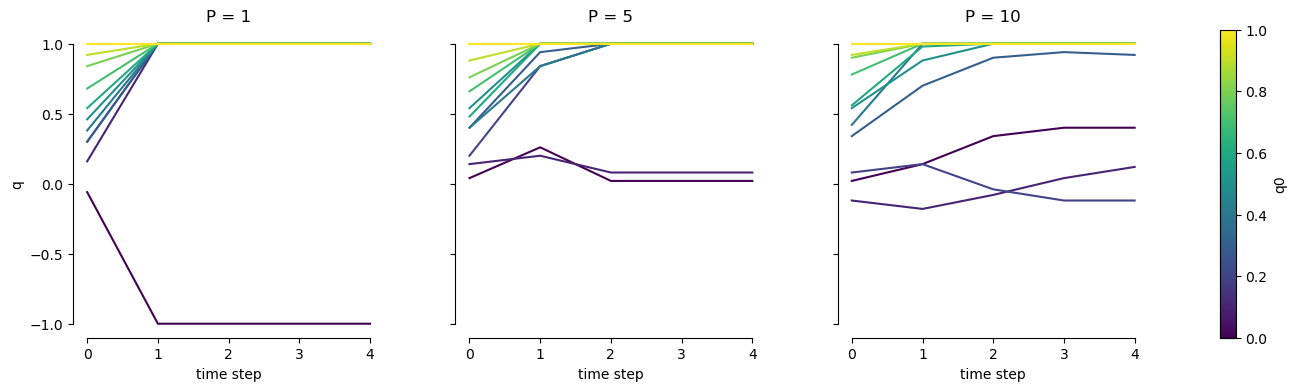

In [4]:
norm = mcolors.Normalize(vmin=min(qs), vmax=max(qs))
cmap = cm.viridis

fig = plt.figure(figsize=(15, 4))
gs = gridspec.GridSpec(1, len(ps) + 1, width_ratios=[1]*len(ps) + [0.05], wspace=0.3)

axes = []
for i, p in enumerate(ps):
    ax = fig.add_subplot(gs[0, i])
    axes.append(ax)
    
    for j, q0 in enumerate(qs):
        mean_trace = q_traces[i, j, :]
        ax.plot(range(timesteps), mean_trace, color=cmap(norm(q0)))
    
    ax.set_title(f'P = {p}')
    ax.set_xlabel('time step')
    ax.set_ylim(-1.1, 1.1) 
    ax.set_yticks([-1, -0.5, 0, 0.5, 1.0])
    if i == 0:
        ax.set_ylabel('q')
    else:
        ax.tick_params(labelleft=False)

cax = fig.add_subplot(gs[0, -1])
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('q0')

sns.despine(trim = True)
plt.tight_layout()
plt.savefig('hw5-1.pdf')

In [13]:
ps = np.arange(1, 101, 1)
timesteps = 5

qs = np.zeros(shape = (len(ps), timesteps))

for _ in range(100):
    for j, p in enumerate(ps):
        u = memory_patterns(p)
        m = weight_matrix(u)
        q = np.zeros(shape = (timesteps))
        s = np.zeros(shape = (timesteps, N))
        s[0, :] = initialise_state(1, u[0])
        q[0] = est_similarity(s[0, :], u[0])

        for i in range(1, timesteps):
            h = np.dot(m, s[i-1, :]) 
            s[i, :] = np.where(h >= 0, 1, -1)
            q[i] = est_similarity(s[i, :], u[0])
        qs[j, :] += q

qs = qs / 100

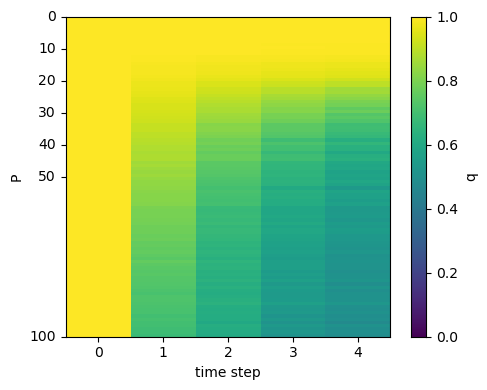

In [ ]:
plt.figure(figsize = (5, 4))
ax = plt.subplot(1, 1, 1)
sns.heatmap(qs, cmap = 'viridis', vmin = 0, vmax = 1, cbar_kws = {'label': 'q'})
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels([0, 25, 50, 75, 100])
plt.xlabel('time step')
plt.ylabel('P')
sns.despine(right = False, top = False)
plt.tight_layout()
plt.savefig('hw5-2.pdf')